# Color Spaces

In this notebook we analyze different color spaces depending on their properties. The target for these tests is background removal for searching the panel in the field.<br>
The main property we considered is that the field is mainly red, because it pretend to be a replica of the Martian field.<br>
This assumption will be used widely during competition's photo analysis.
### Overview of different color spaces
Also take a look at [this link](https://www.learnopencv.com/color-spaces-in-opencv-cpp-python/).
+ **RGB**:
    + device dependent
    + condition dependent
+ **HSV**:
    + device dependent
    + h,s not so much condition dependent
    + cyclic (red look realy different indor/outdoor)
+ **LAB** (luminance + 2 colors)
    + inspired by human vision
    + device INDEPENDENT
    + mostly L condition dependent

In [2]:
# Initial includes - execute first
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Color thresholding RGB
Separating channels it's a usefull way to understand which color threshold based on the current space.<br>
After some tests it turns out that masking the 3 joint channels it's the same than masking them separately and merging.<br>
Simple threshold has the same effect as masking with lower value 0 and same upper val for each channel.

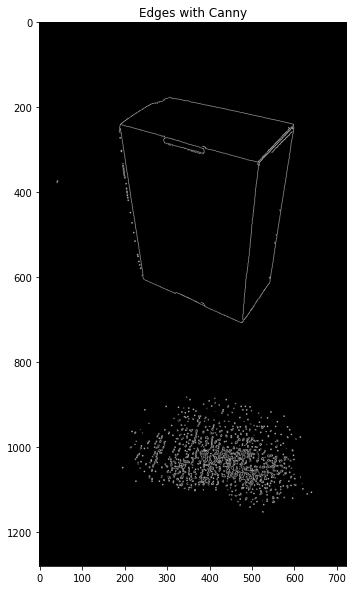

In [7]:
# channels extraction, mask and threshold

# Debug - set 1 to show intermediate results
debhsv = 0
debhist=0
debresult = 0
debmask=0
debcanny = 1

# Load test image and convert it to RGB (default for cv is BGR)
image=cv2.cvtColor(cv2.imread('../../images/box/box3.jpg'),cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Original image")

# For better study effectivness in working with separated channels, create 3 variables
imager,imageg,imageb = cv2.split(image)

#channel histograms
histr,_ = np.histogram(imager, 256, [0,256])#may use imager.flatten()
histg,_ = np.histogram(imageg, 256, [0,256])
histb,_ = np.histogram(imageb, 256, [0,256])

if debhist:
    plt.subplot(1,2,2)
    plt.plot(histr, color = 'r')
    plt.plot(histg, color = 'g')
    plt.plot(histb, color = 'b')
    plt.title("Original image histogram")
    plt.show()
    
#channel merging
#imagem=cv2.merge((rimage,gimage,bimage))

##green = np.uint8([[[0,255,0 ]]])
##hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)

# Mask on the original image without channel separation
wholelow = (0,0,0)
wholehigh = (135,115,115)
wholemask = cv2.bitwise_not(cv2.inRange(image,wholelow,wholehigh))#killmaskt
if debmask:
    plt.imshow(wholemask,cmap='gray')
    plt.show()
wholeimage = cv2.bitwise_and(image,image,mask=wholemask)
if debresult:
    plt.imshow(cv2.cvtColor(wholeimage, cv2.COLOR_RGB2GRAY),cmap='gray')
    plt.show()
    
## if the lower value is zero, a simple thresholding can be applied
##_, threshr = cv2.threshold(imager, 135, 255, cv2.THRESH_BINARY),...
##rgb_thresh = cv2.merge((threshr,...))
##if values of threshold are the same, it's equal to
##_,rgb_thresh = cv2.threshold(image_rgb, thrval, 255, cv2.THRESH_BINARY)

# Edges/contours on the masked image
filterparam = (100,20,0)
imagedges = cv2.Canny(cv2.cvtColor(wholeimage, cv2.COLOR_RGB2GRAY), filterparam[0], filterparam[1], filterparam[2])
if debcanny:
    plt.imshow(imagedges,cmap='gray')
    plt.title("Edges with Canny")
    plt.show()

### Color thresholding HSV
HUE thresholding is not enough with a wild image to separate the color (due to color mixing on the pixels/light conditions), **saturation/value channel** should be used also (as in the example below), in this case similarly to the color mask in hsv space.<br>

https://stackoverflow.com/questions/29156091/opencv-edge-border-detection-based-on-color
<br><br>
HUE channel it's circular, with values [0,179(°)], hence min and max vlues coincide; when those must be considered | our value<0 or >360°, it's better to shift the whole channel by an angular quantity | channel_shift=angular_shift/2<br><br>
Heuristics must be introduced to separate joint contours: thresholding the other channels since borderline pixels may assume a mixed color (hence inside hue range), or dilation to create an inner and outer contour and pick the inner ones(hierarcky>0)

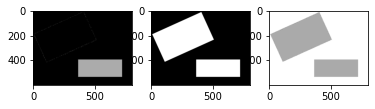

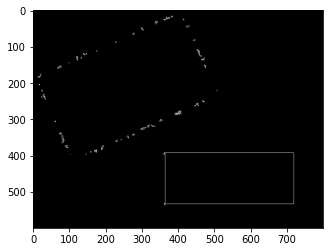

In [8]:
doshift=0

image=cv2.cvtColor(cv2.imread('../../images/rectangles.jpg'),cv2.COLOR_BGR2HSV)
imgh,imgs,imgv=cv2.split(image)
    
plt.subplot(1,3,1)
plt.imshow(imgh,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(imgs,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(imgv,cmap='gray')
plt.show()

if doshift:
    angular_shift=50
    hueshift=angular_shift/2
    imgh=(imgh+ hueshift) % 180
    plt.imshow(imgh,cmap='gray')
    plt.show()

#threshold on s/v channel to separate joint contours,otherwise:
#dilation and picking of inner contours through hierarchy(this one after canny)

#edge detector
imghedg= cv2.Canny(imgh, 10,500,1)

plt.imshow(imghedg,cmap='gray')
plt.show()

if 0:
    limlow=(50,50,50)
    limhigh=(255,255,)
    mask = cv2.inRange(hsvimage, limlow,limhigh)
    thresimage = cv2.bitwise_and(image,image, mask=mask)
  

Tests showed that filtering (gaussian, median) had no improvement on the single H channel edge detection.

### logical thresholding
accessing directly to the channels of the converted image, without the  use of thresholding or masking function

for implementing thresholding in range, 2 consecutive masks are required; execution time appears a little longer

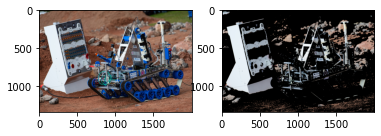

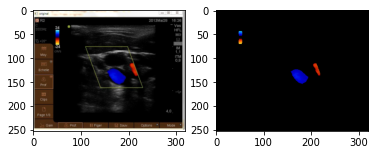

In [7]:
import cv2
from matplotlib import pyplot as plt

img = cv2.cvtColor(cv2.imread('../../images/marsyard/task.jpg'),cv2.COLOR_BGR2RGB)
image_thr = img.copy()
image_thr[(img[...,0]<100) | (img[...,2]<100) |(img[...,1]<100)]=0
## 
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(image_thr)
plt.show()

img = cv2.imread('../../images/z_other/echocolor.jpg')
image_thr = img.copy()

imh = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
image_thr[(imh[...,1]<180) | (imh[...,2]<150)]=0

plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(image_thr)
plt.show()

### mask of black pixels

to avoid considering the black pixels, present in the area where the histogram is analyzed, add a mask to the calcHist, considering that black[hsv] s.t. value==0

https://stackoverflow.com/questions/62875780/how-to-calculate-histogram-on-opencv-without-taking-into-consideration-all-black

https://stackoverflow.com/questions/36689915/opencv-ignoring-pixels-when-generating-a-hue-histogram

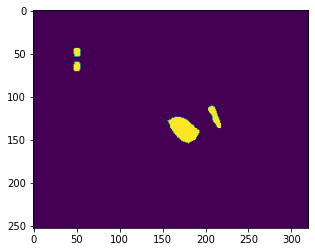

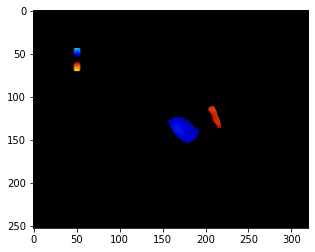

In [94]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

imagehsv=cv2.cvtColor(image_thr,cv2.COLOR_BGR2HSV)
# imageh,images,imagev=cv2.split(imagehsv)
# imageh=imagehsv[...,0];images=imagehsv[...,1];imagev=imagehsv[...,2];
# mask where value channel not zero
vmask=imagehsv[...,2] !=0
vmask=vmask.astype(np.uint8)
plt.imshow(vmask)
plt.show()
masked=cv2.bitwise_and(img,img,mask=vmask)
plt.imshow(masked);plt.show()
# also
vmask2 = imagehsv[...,2][np.where(imagehsv[...,2] > 0,True,False)]
vmask2=vmask2.astype(np.uint8)

### test on a  marsyard image

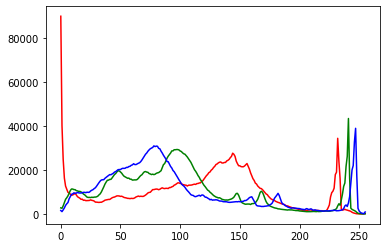

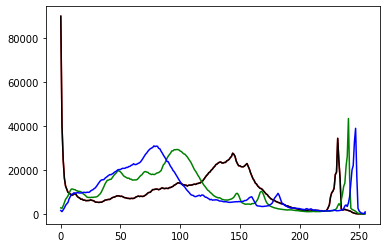

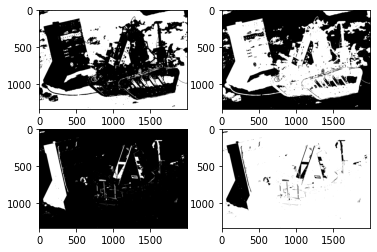

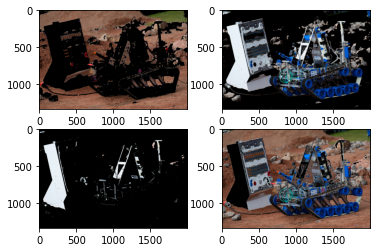

In [33]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
debhist=1

image = cv2.cvtColor(cv2.imread("../../images/marsyard/task-example.jpg"), cv2.COLOR_BGR2RGB)
imager,imageg,imageb = cv2.split(image)

histr,_ = np.histogram(imager,256,[0,256])#may use image.flatten()
histg,_ = np.histogram(imageg,256,[0,256])
histb,_ = np.histogram(imageb,256,[0,256])
histrf,_ = np.histogram(imager.flatten(),256,[0,256])
histgf,_ = np.histogram(imageg.flatten(),256,[0,256])
histbf,_ = np.histogram(imageb.flatten(),256,[0,256])
if debhist:
    plt.plot(histr,color = 'r')
    plt.plot(histg,color = 'g')
    plt.plot(histb,color = 'b')
    plt.show()
    plt.plot(histrf,color = 'r')
    plt.plot(histr,color = 'k')                    
    plt.plot(histgf,color = 'g')
    plt.plot(histbf,color = 'b')
    plt.show()
  
    
#color thresholding
minred=(50,50,50)
maxred=(255,255,255)
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

imagehsv=cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

masknored = cv2.bitwise_not(cv2.inRange(imagehsv, minred,maxred))
maskred = (cv2.inRange(imagehsv, minred,maxred))
imagenored = cv2.bitwise_and(image,image, mask=masknored)
imagered= cv2.bitwise_and(image,image, mask=maskred)
maskwhite = cv2.inRange(imagehsv, light_white, dark_white)
imagewhite = cv2.bitwise_and(image, image, mask=maskwhite)
masknowhite =  cv2.bitwise_not(cv2.inRange(imagehsv, light_white, dark_white))
imagenowhite =cv2.bitwise_and(image, image, mask=masknowhite)

#maskfin= maskred + maskwhite
#imagefin = cv2.bitwise_and(image,image, mask=maskfin)
plt.subplot(2, 2, 1)
plt.imshow(maskred, cmap="gray")
plt.subplot(2, 2, 2)
plt.imshow(masknored, cmap="gray")
plt.subplot(2, 2, 3)
plt.imshow(maskwhite, cmap="gray")
plt.subplot(2, 2, 4)
plt.imshow(masknowhite, cmap="gray")
plt.show()

plt.subplot(2, 2, 1)
plt.imshow(imagered)
plt.subplot(2, 2, 2)
plt.imshow(imagenored)
plt.subplot(2, 2, 3)
plt.imshow(imagewhite)
plt.subplot(2, 2, 4)
plt.imshow(imagenowhite)
plt.show()


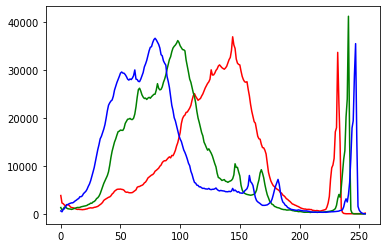

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("../../../images/marsyard/taskfinal.jpg")
imager,imageg,imageb = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

histrf,_ = np.histogram(imager.flatten(),256,[0,256])
histgf,_ = np.histogram(imageg.flatten(),256,[0,256])
histbf,_ = np.histogram(imageb.flatten(),256,[0,256])

plt.plot(histrf,color = 'r');plt.plot(histgf,color = 'g');plt.plot(histbf,color = 'b');plt.show()
  
# imageh,images,imagev = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))

# histhf,_ = np.histogram(imageh.flatten(),256,[0,256])
# histsf,_ = np.histogram(images.flatten(),256,[0,256])
# histvf,_ = np.histogram(imagev.flatten(),256,[0,256])

# plt.plot(histhf,color = 'r');plt.plot(histsf,color = 'g');plt.plot(histvf,color = 'b');plt.show()   

# #color thresholding
# minred,maxred=(50,50,50),(255,255,255)

# light_white,dark_white = (0, 0, 200),(145, 60, 255)

# imagehsv=cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# masknored = cv2.bitwise_not(cv2.inRange(imagehsv, minred,maxred))
# maskred = (cv2.inRange(imagehsv, minred,maxred))
# imagenored = cv2.bitwise_and(image,image, mask=masknored)
# imagered= cv2.bitwise_and(image,image, mask=maskred)
# maskwhite = cv2.inRange(imagehsv, light_white, dark_white)
# imagewhite = cv2.bitwise_and(image, image, mask=maskwhite)
# masknowhite =  cv2.bitwise_not(cv2.inRange(imagehsv, light_white, dark_white))
# imagenowhite =cv2.bitwise_and(image, image, mask=masknowhite)

# #maskfin= maskred + maskwhite
# #imagefin = cv2.bitwise_and(image,image, mask=maskfin)
# plt.subplot(2, 2, 1);plt.imshow(maskred, cmap="gray");plt.subplot(2, 2, 2);
# plt.imshow(masknored, cmap="gray");plt.subplot(2, 2, 3);plt.imshow(maskwhite, cmap="gray");
# plt.subplot(2, 2, 4);plt.imshow(masknowhite, cmap="gray");plt.show()

# plt.subplot(2, 2, 1);plt.imshow(imagered);plt.subplot(2, 2, 2);plt.imshow(imagenored);
# plt.subplot(2, 2, 3);plt.imshow(imagewhite);plt.subplot(2, 2, 4);plt.imshow(imagenowhite);plt.show()


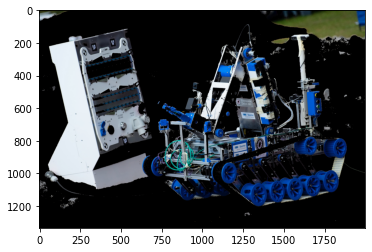

In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../../images/marsyard/task-example.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
#since hsv red is on the borber, operate channel's shift
doshift=0

if doshift:
    angular_shift=30
    hueshift=angular_shift/2
    img=(img+ hueshift) % 180

#in SHIFTED HSV range
MAX_V_RANGE=255
LOWRED_MIN = np.array([0, 0, 0],np.uint8)
LOWRED_MAX = np.array([20, 255, MAX_V_RANGE],np.uint8)
HIGHRED_MIN = np.array([159, 0, 0],np.uint8)
HIGHRED_MAX = np.array([179, 255, MAX_V_RANGE],np.uint8)
GREEN_MIN= np.array([31, 0, 0],np.uint8)
GREEN_MAX = np.array([70, 255, MAX_V_RANGE],np.uint8)
BLUE_MIN= np.array([91, 0, 0],np.uint8)
BLUE_MAX = np.array([150, 255, MAX_V_RANGE],np.uint8)

masknoredlow = cv2.bitwise_not(cv2.inRange(img, LOWRED_MIN,LOWRED_MAX))
masknoredhigh = cv2.bitwise_not(cv2.inRange(img, HIGHRED_MIN,HIGHRED_MAX))
masknogreen = cv2.bitwise_not(cv2.inRange(img, GREEN_MIN,GREEN_MAX))
masknoblue = cv2.bitwise_not(cv2.inRange(img, BLUE_MIN,BLUE_MAX))
imagenored = cv2.bitwise_and(img,img, mask=(masknoredlow &masknoredhigh))# & masknogreen))

plt.imshow(cv2.cvtColor(imagenored,cv2.COLOR_HSV2RGB))
plt.show()



### adaptive color mask


finds the most common pixel distribution

### meanshift, camshift

https://docs.opencv.org/master/d7/d00/tutorial_meanshift.html

cv.calcHist(images, channels, mask, histSize, ranges[, hist[, (uniform),accumulate]])

    images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".
    channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
    mask : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
    histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
    ranges : this is our RANGE. Normally, it is [0,256].
    uniform: if true, bins have same size
    accumulate: if false, clears the histogram at the beginning
    
normalize the histogram so its values fall in the range indicated by the parameters entered

**improv:** mask usage before tracking (color selection)

In [4]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

doMeanShift=1

videosrc='../../images/video/3bodybed.mp4'
cap = cv.VideoCapture(videosrc)
# take first frame of the video
ret,frame = cap.read()
# setup initial location of window
x, y, w, h = cv.selectROI(frame)
cv.destroyAllWindows()
track_window = (x, y, w, h)
roi = frame[y:y+h, x:x+w]
hsv_roi =  cv.cvtColor(roi, cv.COLOR_BGR2HSV)
mask = cv.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv.calcHist([hsv_roi],[0],mask,[179],[1,180])
cv.normalize(roi_hist,roi_hist,0,255,cv.NORM_MINMAX)
# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1 )

while(1):
    ret, frame = cap.read()
    if ret == True:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        
        if doMeanShift:
            # apply meanshift to get the new location
            ret, track_window = cv.meanShift(dst, track_window, term_crit)
            # Draw it on image
            x,y,w,h = track_window
            img2 = cv.rectangle(frame, (x,y), (x+w,y+h), 255,2)
        else:
            # apply camshift to get the new location
            ret, track_window = cv.CamShift(dst, track_window, term_crit)
            # Draw it on image
            pts = cv.boxPoints(ret)
            pts = np.int0(pts)
            img2 = cv.polylines(frame,[pts],True, 255,2)
        cv.imshow('img2',img2)
        k = cv.waitKey(30) & 0xff
        if k == 27:
            break
    else:
        break
cv.destroyAllWindows()      


### back projection of histogram
assigns a probability for each pixel of the image to belong to a specific area of interest

https://docs.opencv.org/2.4/doc/tutorials/imgproc/histograms/back_projection/back_projection.html

https://docs.opencv.org/master/dc/df6/tutorial_py_histogram_backprojection.html#gsc.tab=0

**improv:** understand most useful structuring element
            acquire more roi and use a mean value
            sum more mask
            
histograms can be compared to samples from pictures of marsyard or color ranges

unsmootherd mask


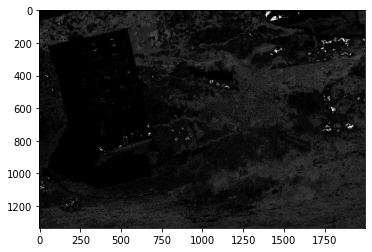

smoothed mask


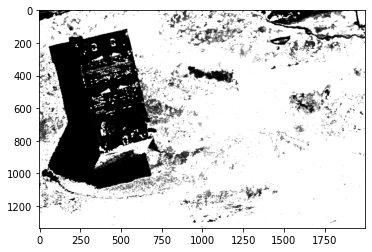

thresholded mask


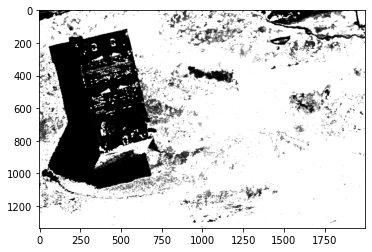

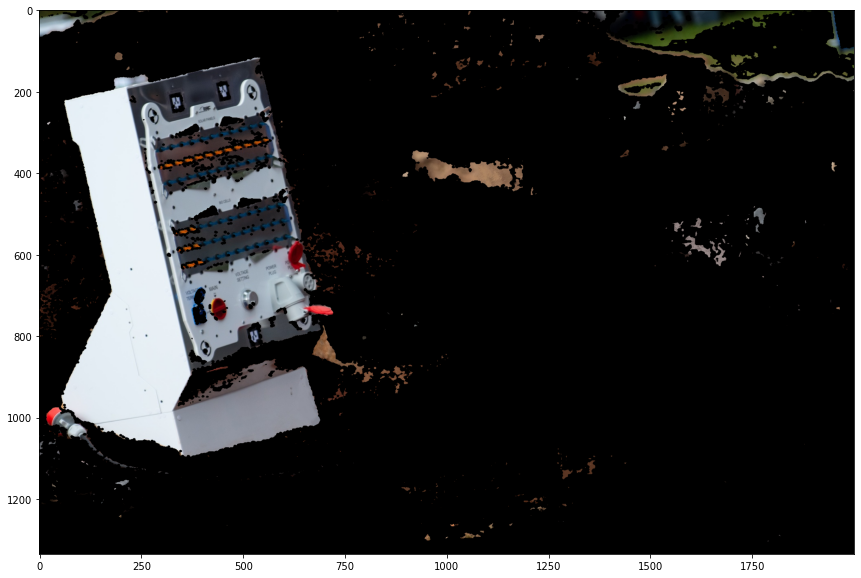

In [8]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
manualselect=0
target =cv.imread('../../../images/marsyard/taskfinal.jpg')
hsvt = cv.cvtColor(target,cv.COLOR_BGR2HSV)
#manually selection of roi
#if manualselect:
#    roi = cv.selectROI(target)
#    cv.destroyAllWindows()
    #extraction of roi from image
#    roi=target[roi[1]:roi[1]+roi[3],roi[0]:roi[0]+roi[2]]
#else:
roi=cv.imread('../../../images/marsyard/samples/terrain/background.jpg')
hsv = cv.cvtColor(roi,cv.COLOR_BGR2HSV)

#roi histogram
roihist = cv.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )

# normalization sets the value inside the wanted range
cv.normalize(roihist,roihist,0,255,cv.NORM_MINMAX)

#backprojection mask, unsmoothed, noisy
mask = cv.calcBackProject([hsvt],[0,1],roihist,[0,180,0,256],1)
print('unsmootherd mask')
plt.imshow(mask,cmap='gray')
plt.show()

# Now convolute with structural element
##ranging in different element size and shape
#testmanyparam=0
#if testmanyparam:
#    for sizeEl in (2,2):
 #        sizeEl2=sizeEl
  #      for ii in [cv.MORPH_RECT,cv.MORPH_ELLIPSE]:
   #         for threshval in range(4,8):
    #            print('size1',sizeEl,'element',ii,'thresval',10*threshval)
     #           disc = cv.getStructuringElement(ii,(sizeEl2,sizeEl))
                #bp mask smoothing
      #          cv.filter2D(mask,-1,disc,mask)
                #mask thresholding (since mask€ [0,1])
       #         _,thresh = cv.threshold(mask,10*threshval,255,0)
                #creating a 3 channel mask (for a 3 channel image)
        #        thresh = cv.merge((thresh,thresh,thresh))
                #mask application
         #       result = cv.bitwise_and(cv.cvtColor(target,cv.COLOR_BGR2RGB),cv.bitwise_not(thresh))
          #      result = np.vstack((target,thresh,result))
           #     plt.figure(figsize=(20,10))
            #    plt.imshow(result,cmap='gray')
             #   plt.show()
              #  print('##')
#else:
sizeEl=7
sizeEl2=sizeEl
threshval=50
elemType=cv.MORPH_ELLIPSE
disc = cv.getStructuringElement(elemType,(sizeEl2,sizeEl))
cv.filter2D(mask,-1,disc,mask)
print('smoothed mask')
plt.imshow(mask,cmap='gray')
plt.show()
_,thresh = cv.threshold(mask,threshval,255,0)
print('thresholded mask')
plt.imshow(mask,cmap='gray')
plt.show()
thresh = cv.merge((thresh,thresh,thresh))
result = cv.bitwise_and(cv.cvtColor(target,cv.COLOR_BGR2RGB),cv.bitwise_not(thresh))
#result = np.vstack((cv.cvtColor(target,cv.COLOR_BGR2RGB),thresh,result))
plt.figure(figsize=(20,10))
plt.imshow(result)
plt.show()

### backprojection of many images

**issue** can't stack images having different sizes

**notes on calcHist()** since it can include a mask when calculating an histogram, roi extraction may happen in terms of masking the non-roi area, this leads to images of the same size, **but** lots of black pixels to be excluded; HSV black | V==0 , **solution** exclud V channel from the histogram

**solution:** 
1. extract rois of same size ( and stack)

2. average the histogram

3. **apply multiple masks**

### histogram comparison
https://docs.opencv.org/3.4/d8/dc8/tutorial_histogram_comparison.html

https://www.pyimagesearch.com/2014/07/14/3-ways-compare-histograms-using-opencv-python/

https://www.pyimagesearch.com/2014/01/22/clever-girl-a-guide-to-utilizing-color-histograms-for-computer-vision-and-image-search-engines/


hist compare methods:

cv.HISTCMP_CORREL==0 : correlation

cv.HISTCMP_CHISQR==1 : chi squared

cv.HISTCMP_CHISQR_ALT==4 : alternativeformula 

cv.HISTCMP_INTERSECT==2 : intersection

cv.HISTCMP_BHATTACHARYYA==3 : Bhattacharyya distance

cv.HISTCMP_HELLINGER==3 : hellinger d., same as above

cv.HISTCMP_KL_DIV==5 : Kullback-Leibler divergence


first one is the simplest



In [ ]:
def mychi2_distance(histA, histB, eps = 1e-10):
# compute the chi-squared distance
    d = 0.5 * np.sum([((a - b) ** 2) / (a + b + eps)
        for (a, b) in zip(histA, histB)])
        # return the chi-squared distance
    return d

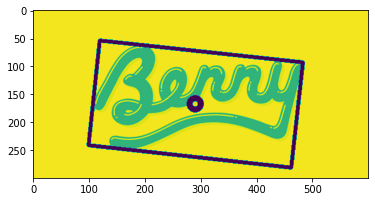

291.35809326171875 and 167.86480712890625


AttributeError: 'tuple' object has no attribute 'points'

In [20]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

image=cv.cvtColor(cv.imread('../../images/z_other/commercial.jpg'),cv.COLOR_BGR2GRAY)
edges=cv.Canny(image,120,60)
cnts = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]#_susbtituible
maxcnt=max(cnts, key=len)
#_maxCntRoi=max(cntsRoi, key=lambda x: cv.contourArea(x)) ##alternatively
    

x,y,w,h = cv.boundingRect(maxcnt)
centerrect=(xc,yc)=(x+w//2, y+h//2)
imagerect=cv.rectangle(image.copy(), (x,y), (x+w,y+h), 0, 5)
# plt.imshow(imagerect);plt.show()

rotrect = cv.minAreaRect(maxcnt)
rotbox = np.int0(cv.boxPoints(rotrect))
imagerot=cv.polylines(image.copy(),[rotbox],True,0,5)
centerrot=(((rotbox[0]+rotbox[2])//2).reshape(2,1,1)[0],\
                            ((rotbox[0]+rotbox[2])//2).reshape(2,1,1)[1])
center=cv.circle(imagerot.copy(),centerrot,10,0,10)
plt.imshow(center);plt.show()

(x, y), (width, height), angle = rotrect

print(rotrect[0][0],'and',rotrect[0][1])


print(rotrect.points)
#rotrect.angle, .height .width
# if (rotated_rect.size.width < rotated_rect.size.height) {
#   blob_angle_deg = 90 + blob_angle_deg;
# }
# Mat mapMatrix = getRotationMatrix2D(center, blob_angle_deg, 1.0);

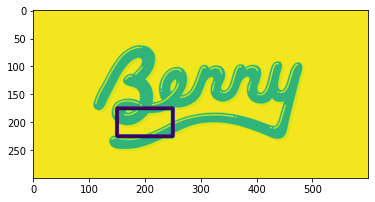

[[150 225]
 [150 175]
 [250 175]
 [250 225]]


In [18]:
myrect=((200,200),(100,50),0)
mybox= np.int0(cv.boxPoints(myrect))
myimage=cv.polylines(image.copy(),[mybox],True,0,5)
plt.imshow(myimage);plt.show()
print(mybox)